# Analyzing Deaths of Horror Characters by Gender and Race/Ethnicity in Feature Films from 1970 to 2020

A number of sources were scraped and compared for the following information:
 - Feature horror films from 1970 - 2020
 - Characters in those feature horror films and actors who portrayed them
 - List of characters who were killed in those horror films
 - Race/Ethnicity and gender of actors
 
For a full description of the data collection process, see the [README](README.md) file for this project.

In [1]:
# Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Plotly setup
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) # connected plotly with cufflinks for use in jupyter notebook
cf.go_offline() # use cufflinks offline

In [3]:
# Pie chart settings
settings = {'autopct':"%.1f%%",
            'wedgeprops':{'edgecolor': 'black'},
            'labels':['Survives', 'Dies'],
            'pctdistance':0.5,
            'labeldistance':None,
            'colors':['mediumseagreen', 'palevioletred']}

leg_set = {'labels':['Survives', 'Dies'],
           'loc':'upper center',
           'bbox_to_anchor':(0.5, 0.95)}

In [4]:
# Load movie data
movies = pd.read_csv('../data/processed/horror_movies.csv', index_col=0)
# Load character data
characters = pd.read_csv('../data/processed/horror_characters.csv', index_col=[0,1])
# Load category data
main = pd.read_csv('../data/processed/category_counts.csv', index_col=0)

In [5]:
# Movies info
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10605 entries, 0 to 10624
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              10605 non-null  object 
 1   Year               10605 non-null  float64
 2   Plot               10605 non-null  object 
 3   Director(s)        10562 non-null  object 
 4   Star(s)            10373 non-null  object 
 5   Stripped Title     10604 non-null  object 
 6   Horror Wiki Index  697 non-null    float64
 7   Horror Wiki URL    697 non-null    object 
dtypes: float64(2), object(6)
memory usage: 745.7+ KB


In [6]:
# A peek at the movies dataframe
movies.head()

,Title,Year,Plot,Director(s),Star(s),Stripped Title,Horror Wiki Index,Horror Wiki URL
Movie Index,,,,,,,,
0,An Evening of Edgar Allan Poe,1970.0,Vincent Price recites four Edgar Allen Poe sto...,Kenneth Johnson,Vincent Price,an evening of edgar allan poe,NaN,NaN
1,The Dunwich Horror,1970.0,Wilbur Whateley travels to the Arkham Miskaton...,Daniel Haller,"Sandra Dee, Dean Stockwell, Ed Begley, Lloyd B...",dunwich horror,NaN,NaN
2,The Ravager,1970.0,"While serving in Vietnam, a demolitionist witn...",Charles Nizet,"Pierre Agostino, Jo Long, Lynn Hayes, Luanne R...",ravager,NaN,NaN
3,Bloodthirsty Butchers,1970.0,A murderous barber and his equally psychopathi...,Andy Milligan,"John Miranda, Annabella Wood, Berwick Kaler, J...",bloodthirsty butchers,NaN,NaN
4,Torture Dungeon,1970.0,"In Medival England, a sadistic duke plots to k...",Andy Milligan,"Gerald Jacuzzo, Susan Cassidy, Patricia Dillon...",torture dungeon,NaN,NaN


In [7]:
# Characters info
characters.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11344 entries, (787, 0) to (1225, 11)
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   actor               11344 non-null  object
 1   character           11315 non-null  object
 2   stripped character  11315 non-null  object
 3   killed              3014 non-null   object
 4   actor url           3757 non-null   object
 5   race                11344 non-null  object
 6   gender              11344 non-null  object
dtypes: object(7)
memory usage: 696.1+ KB


In [8]:
# A peek at the characters dataframe
characters.head(10)

actor              character  \
Horror Wiki Index char index                                                   
787               0                       John Cusack            Mike Enslin   
                  1                 Samuel L. Jackson            Gerald Olin   
                  2                    Mary McCormack            Lily Enslin   
                  3                     Tony Shalhoub            Sam Farrell   
                  4                        Len Cariou          Mike's father   
                  5           Jasmine Jessica Anthony           Katie Enslin   
                  6                    Isiah Whitlock  Jr. as Hotel Engineer   
                  7                       Kim Thomson       Hotel Desk Clerk   
                  8                    Benny Urquidez     Claw Hammer Maniac   
1128              0                       Thomas Jane          Wilfred James   

                                stripped character killed  \
Horror Wiki Index char index                                
787               0                    mike enslin    NaN   
                  1                    gerald olin    NaN   
                  2                    lily enslin    NaN   
                  3                    sam farrell    NaN   
                  4                   mikes father    NaN   
                  5                   katie enslin    NaN   
                  6           jr as hotel engineer    NaN   
                  7               hotel desk clerk    NaN   
                  8             claw hammer maniac    NaN   
1128              0                  wilfred james    NaN   

                                                              actor url  \
Horror Wiki Index char index                                              
787               0           http://www.nndb.com/people/787/000022721/   
                  1           http://www.nndb.com/people/563/000023494/   
                  2           http://www.nndb.com/people/829/000131436/   
                  3           http://www.nndb.com/people/292/000025217/   
                  4           http://www.nndb.com/people/323/000130930/   
                  5                                                 NaN   
                  6                                                 NaN   
                  7                                                 NaN   
                  8                                                 NaN   
1128              0           http://www.nndb.com/people/931/000044799/   

                                        race    gender  
Horror Wiki Index char index                            
787               0                    White      Male  
                  1                    Black      Male  
                  2                    White    Female  
                  3           Middle Eastern      Male  
                  4                    White      Male  
                  5                 Unlisted  Unlisted  
                  6                 Unlisted  Unlisted  
                  7                 Unlisted  Unlisted  
                  8                 Hispanic      Male  
1128              0                    White      Male

## Exploratory Data Analysis

### Frequency of Horror Movies by Year

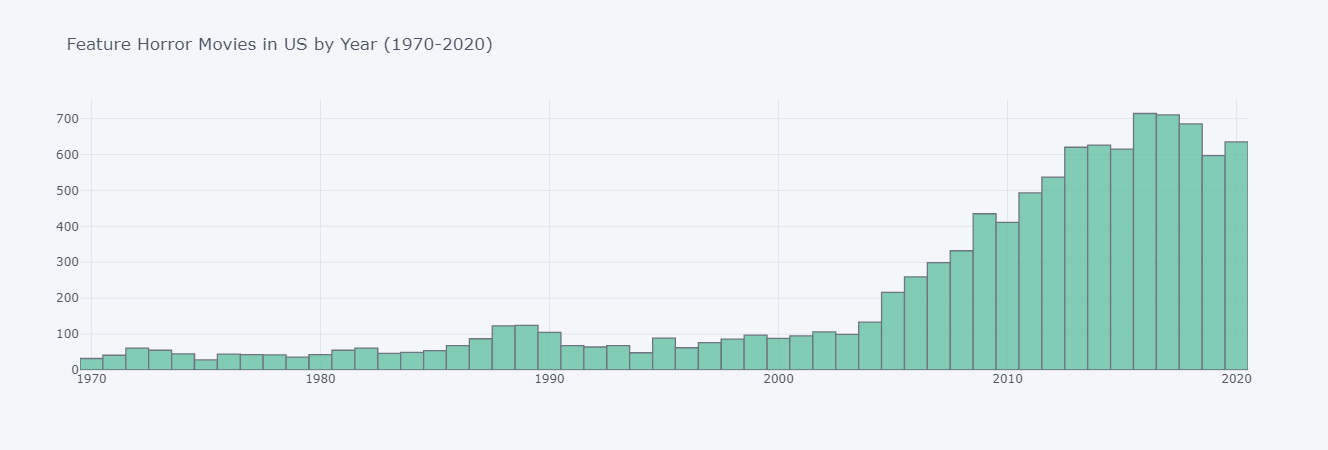

In [9]:
# Exploring the number of horror movies per year
movies['Year'].iplot(kind='hist', title='Feature Horror Movies in US by Year (1970-2020)', colorscale='set2')

### Horror Characters

How many of our characters do we have killed vs not killed info about?

In [10]:
all_char_data = characters['killed'].fillna('Unknown').value_counts()
all_char = pd.DataFrame(all_char_data).transpose().rename(index={'killed': 'Killed Status'}, columns={False: 'Survives', True: 'Dies'})
all_char

,Unknown,Survives,Dies
Killed Status,8330,1861,1153


It's clear that we have much more unknown than known data!

**Q:** How many characters do we have killed/not killed information that is not unknown?

In [11]:
df = characters[characters['killed'].notna()]

In [12]:
df['actor'].count()

3014

**A:** We have 3014 characters that we know the killed vs. not killed status of. 

**Q:** How many characters do we know the killed status of that we also know race and gender of the actor?

In [13]:
df = df[(df['gender'] != 'Unlisted') & (df['race'] != 'Unlisted')]

In [14]:
df['actor'].count()

1434

**A:** We have 1434 characters who we have full killed, race, and gender information. 

### Character Status by Gender

In [15]:
# What we know
main_gen = main.loc[['Female', 'Male', 'Other']]
main_gen

,Survived,Died
Female,282,183
Male,555,371
Other,24,18


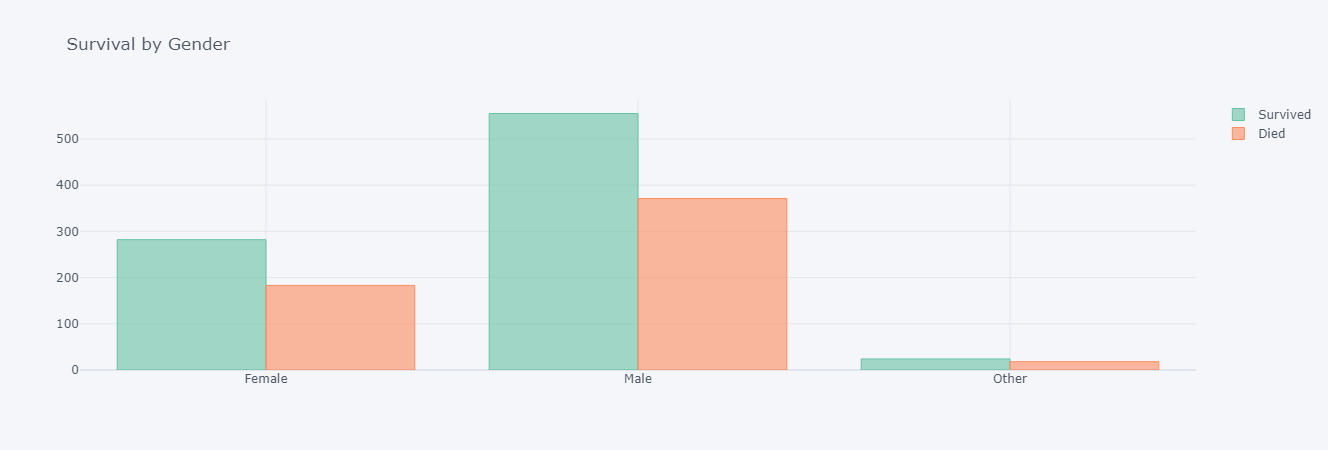

In [16]:
# Exploring survival by gender
main_gen.iplot(kind='bar', title='Survival by Gender', colorscale='set2')

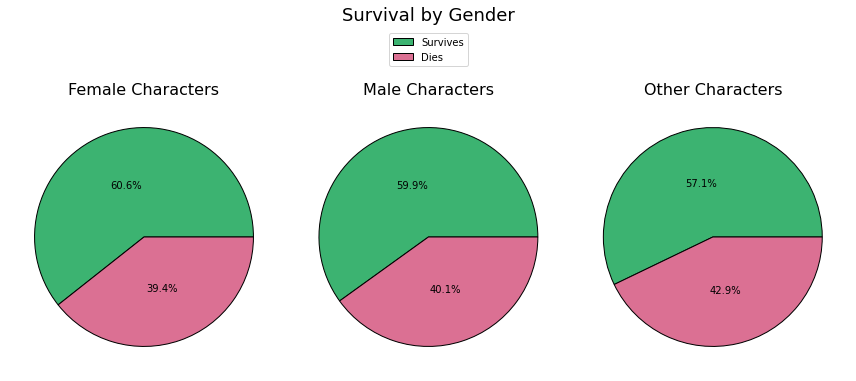

In [17]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

axes[0].pie(main_gen.loc['Female'], **settings);
axes[0].set_title('Female Characters', fontsize=16);

axes[1].pie(main_gen.loc['Male'], **settings);
axes[1].set_title('Male Characters', fontsize=16);

axes[2].pie(main_gen.loc['Other'], **settings);
axes[2].set_title('Other Characters', fontsize=16);

fig.suptitle('Survival by Gender', fontsize=18, y=1)

fig.legend(**leg_set)
plt.tight_layout()

### Character Status by Race/Ethnicity

In [18]:
# What we know
main_race = main.loc[['White', 'Black', 'Hispanic', 'Multiracial', 'Asian/Indian']]
main_race

,Survived,Died
White,780,509
Black,46,34
Hispanic,17,17
Multiracial,6,11
Asian/Indian,12,1


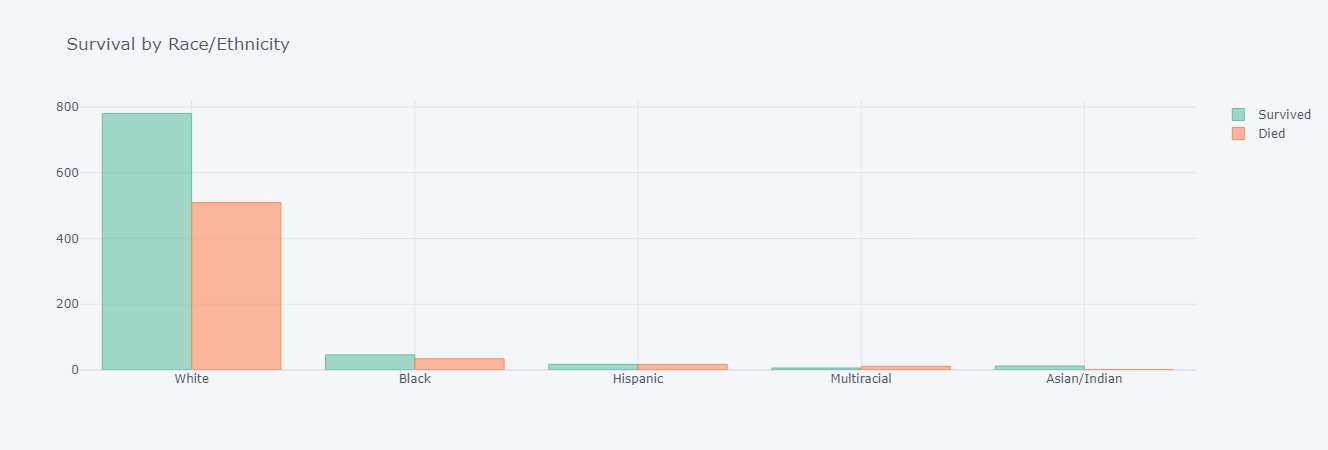

In [19]:
# Exploring survival by race/ethnicity
main_race.iplot(kind='bar', title='Survival by Race/Ethnicity', colorscale='set2')

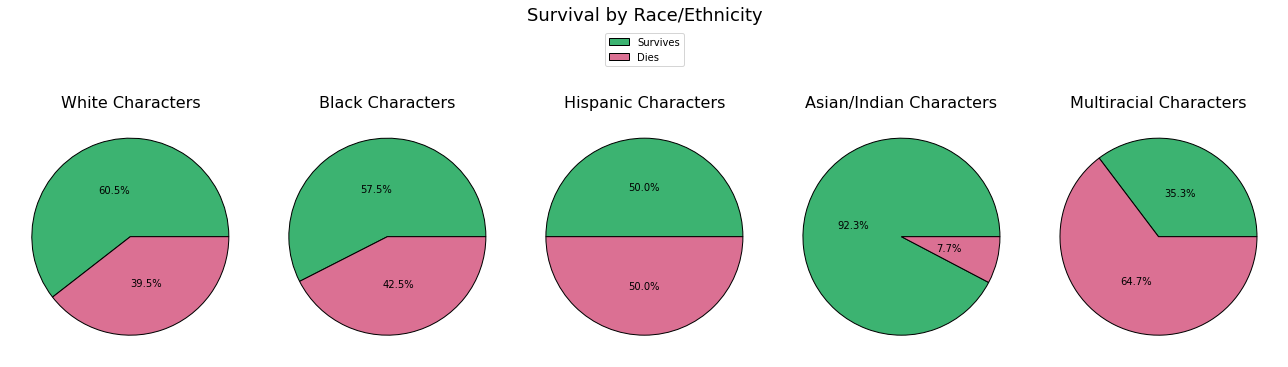

In [20]:
fig,axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 6))

axes[0].pie(main_race.loc['White'], **settings);
axes[0].set_title('White Characters', fontsize=16);

axes[1].pie(main_race.loc['Black'], **settings);
axes[1].set_title('Black Characters', fontsize=16);

axes[2].pie(main_race.loc['Hispanic'], **settings);
axes[2].set_title('Hispanic Characters', fontsize=16);

axes[3].pie(main_race.loc['Asian/Indian'], **settings);
axes[3].set_title('Asian/Indian Characters', fontsize=16);

axes[4].pie(main_race.loc['Multiracial'], **settings);
axes[4].set_title('Multiracial Characters', fontsize=16);

fig.suptitle('Survival by Race/Ethnicity', fontsize=18, y=1)

fig.legend(**leg_set)
plt.tight_layout()

### Remarks

Here's a reminder of the breakdown of characters we have full information for:

In [21]:
main['Total'] = main['Survived'] + main['Died']
main

,Survived,Died,Total
Female,282,183,465
Male,555,371,926
Other,24,18,42
Hispanic,17,17,34
Asian/Indian,12,1,13
Multiracial,6,11,17
White,780,509,1289
Black,46,34,80


I'm not sure there's a lot to be said, mostly because of how much unknown data there still is, however, of the 1434 characters we do have adequate data on, we can note the following:
 - More survived than died.
 - Of the 465 female characters we have full info on, more survived than died.
 - Of the 926 male characters we have full info on, more survived than died.
 - Of the 42 characters that are a gender other than male/female, more survived than died.
 - Of the 13 Asian/Indian characters we have full info on, more survived than died.
 - Of the 80 Black characters we have full info on, more survived than died.
 - Of the 34 Hispanic characters we have full info on, it was an exact split.
 - Of the 17 Multiracial characters we have full info on, more died than survived.
 - Of the 1289 White characters we have full info on, more survived than died.

In terms of representation (if our sample is giving us an adquate picture), characters are predominately male and white, and tend to survive. Representation is seriously lacking for Black, Hispanic, Multiracial, Asian/Indian characters and characters outside the Female/Male gender roles in US horror films. Moreover, Hispanic and Multiracial characters seem to have much more negative fates.

## Can we do any sort of predictions with this?

**Q:** How much missing data do we have?

In [22]:
# Replace 'Unlisted' in race/gender columns with NaN
characters.replace('Unlisted', np.nan, inplace=True);

<AxesSubplot:ylabel='Horror Wiki Index-char index'>

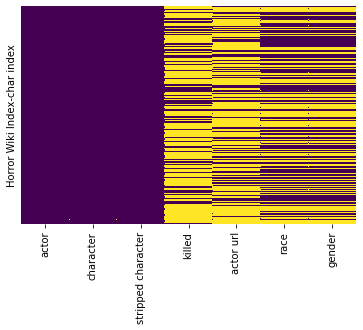

In [23]:
# Heatmap of missing info
sns.heatmap(characters.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**A:** What we really care about is the 'killed' column, and we have quite a bit of missing information there.

We want to focus on killed, race, and gender. Let's remove everything else.

In [24]:
characters.drop(['actor', 'character', 'stripped character', 'actor url'], axis=1, inplace=True)

In [25]:
# Remove rows that contain missing data
characters.dropna(inplace=True)

In [26]:
# Preparing data for machine learning algorithms: change categorical features to indicator variables
k = pd.get_dummies(characters['killed'], drop_first = True, prefix='killed')
g = pd.get_dummies(characters['gender'], drop_first = True, prefix='gender')
r = pd.get_dummies(characters['race'], drop_first = True, prefix='race')
char_ml = pd.concat([characters, k, g, r], axis=1)

In [27]:
char_ml.head()

killed   race  gender  killed_True  gender_Male  \
Horror Wiki Index char index                                                   
262               0           False  White  Female            0            0   
                  1           False  White    Male            0            1   
                  2            True  White    Male            1            1   
                  3            True  White  Female            1            0   
                  5           False  White    Male            0            1   

                              gender_Other  gender_Transgender  race_Black  \
Horror Wiki Index char index                                                 
262               0                      0                   0           0   
                  1                      0                   0           0   
                  2                      0                   0           0   
                  3                      0                   0           0   
                  5                      0                   0           0   

                              race_Hispanic  race_Multiracial  race_Other  \
Horror Wiki Index char index                                                
262               0                       0                 0           0   
                  1                       0                 0           0   
                  2                       0                 0           0   
                  3                       0                 0           0   
                  5                       0                 0           0   

                              race_White  
Horror Wiki Index char index              
262               0                    1  
                  1                    1  
                  2                    1  
                  3                    1  
                  5                    1

In [28]:
# Let's keep only our numerical values now
char_ml.drop(['killed', 'race', 'gender'], axis=1, inplace=True)
char_ml.reset_index(drop=True, inplace=True)

In [29]:
char_ml.head()

,killed_True,gender_Male,gender_Other,gender_Transgender,race_Black,race_Hispanic,race_Multiracial,race_Other,race_White
0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1


#### Do we have any variables with strong correlations to our target variable of 'killed'?

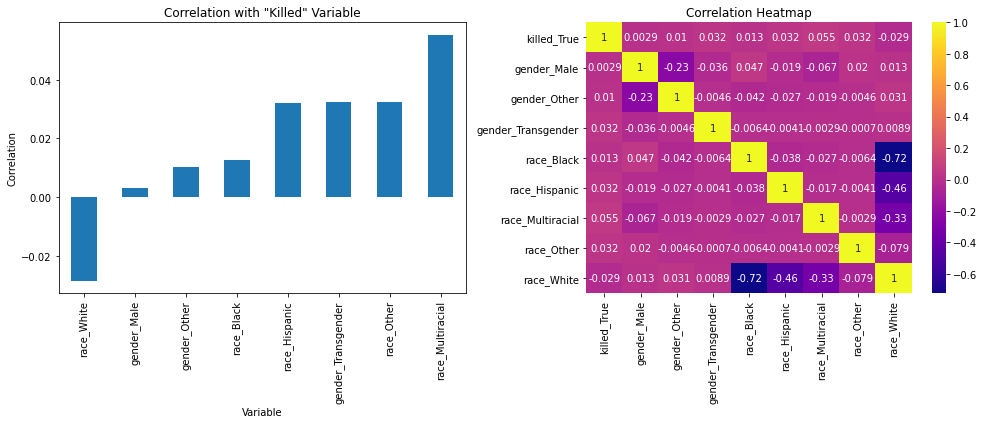

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))

ax1.set_xlabel('Variable')
ax1.set_ylabel('Correlation')
ax1.set_title('Correlation with "Killed" Variable')
char_ml.corr()['killed_True'][1:].sort_values().plot(kind='bar', ax=ax1)

ax2.set_title('Correlation Heatmap')
sns.heatmap(char_ml.corr(), annot=True, cmap='plasma', ax=ax2)

plt.tight_layout()

It looks like we see some higher correlation with race as opposed to gender.

In general, we don't see a lot of correlation, so we probably won't be able to fit a good predictive model - but let's try anyway!

In [370]:
# Useful ML libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [51]:
# Train/test, split data - we want to predict whether or not a character is killed
X = char_ml.drop('killed_True', axis=1)
y = char_ml['killed_True']

**Q:** What's the balance of our data?

In [53]:
# Shape of current data
print(Counter(y))

Counter({0: 861, 1: 573})


**A:** We definitely have quite a large imbalance that we'll likely want to account for.

Survived: 861 <br>
Died: 573

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=108)

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

# Instantiate model
lr = LogisticRegression()

# Fit model
lr.fit(X_train, y_train)

# Make predictions
lr_pred = lr.predict(X_test)

**Q:** Is our model valid?

In [59]:
# Classification report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.59      0.98      0.73       253
           1       0.40      0.02      0.04       178

    accuracy                           0.58       431
   macro avg       0.49      0.50      0.39       431
weighted avg       0.51      0.58      0.45       431



What is our classification report showing us?

**Precision:** When the model predicts survival/death, how often is it correct?

Our model correctly predicts survival (0) with 59% precision and death with 40% precision. These aren't great.

**Recall:** Of all the survival/deaths, how many were correctly classified as survival/death (respectively)?

Our model shows that out of all survivals, 98% were correctly classified as survived, and out of all the deaths, only 2% were correctly classified as killed. This is great on the survival side, but very poor on the death side. My goal would be to limit the number of False Negatives (actual deaths predicted as survivals), so we would prioritize recall over precision, however, our data is not symmetric, since we have more survivals than deaths in our data (so our model will likely predict survival more often), which makes this not such a reliable metric.

**Accuracy:** How many character statuses did the model correctly classify?

The accuracy of our model was 58%, but isn't very informative because our data is not symmetric, as stated above. 

**F1 Score:** The F1 score attempts to balance precision and recall by considering their weighted average.

In our model, we have an F1 score of 73% for survival, and only 4% for death. 

In [60]:
# Confusion matrix [TN, FP][FN, TP]
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, lr_pred))

[[247   6]
 [174   4]]


What is our confusion matrix showing us?

| n=431 | Predicted 0 (Survival) | Predicted 1 (Death) |
| --- | ------------------ | --------------------- |
| **Actual 0 (Survival)** | 247 <br> True Negative | 6 <br> False Positive (Type I Error) |
| **Actual 1 (Death)** |174 <br> False Negative (Type II Error) | 4 <br> True Positive |

**A:** It doesn't look so good.

Our model can predict survival (0) decently well, but, as stated above, that's likely a consequence of the asymmetry of our data.

Our model does a very poor job of predicting death (1).

Overall, we see poor metrics across the board, and in our confusion matrix, we see a high number of false negatives (Type II errors), meaning our model predicts survival (0), but the character actually survived (1). It doesn't seem like we confidently predict the status of our characters based on race/gender.

**Q:** If we penalize misclassifications of the minority class (death - 1), does this improve our model?

In [62]:
# Adding class_weight='balanced' penalizes misclassifications of (1)

# Instantiate model
lrb = LogisticRegression(class_weight='balanced')

# Fit model
lrb.fit(X_train, y_train)

# Make predictions
lrb_pred = lrb.predict(X_test)

# Evaluate model
print(confusion_matrix(y_test, lrb_pred))
print(classification_report(y_test, lrb_pred))

[[238  15]
 [166  12]]
              precision    recall  f1-score   support

           0       0.59      0.94      0.72       253
           1       0.44      0.07      0.12       178

    accuracy                           0.58       431
   macro avg       0.52      0.50      0.42       431
weighted avg       0.53      0.58      0.47       431



**A:** It doesn't seem we have made much improvement. Precision of classifying (1) went up to 44%, recall up to 7%, and f1-score up to 12%, but the imbalance in the data is still causing great issue.

In fact, when we compare the Receiver Operating Characteristic Curves (ROC) for each model, we find that there is only a slight difference, and both are extremely unskilled at identifying deaths.

In [63]:
# Some functions we will use
from sklearn.metrics import roc_auc_score, roc_curve

def get_roc(model):
    # Predict probabilities
    probs = model.predict_proba(X_test)
    
    # Keep probabilities for the (1) outcome only
    probs = probs[:, 1]
    
    # Calculate scores
    auc = roc_auc_score(y_test, probs)
    
    # Calculate roc curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    
    return (auc, fpr, tpr)

def plot_roc(ax, fpr, tpr, auc, title, color):
    ax.plot(fpr, tpr, color=color, label='AUC = %.3f' % auc)
    ax.legend(loc="lower right")
    if ax == plt:
        ax.title(title)
    else:
        ax.set_title(title)
    ax.plot([0, 1], [0, 1],'r--', label='No Skill')

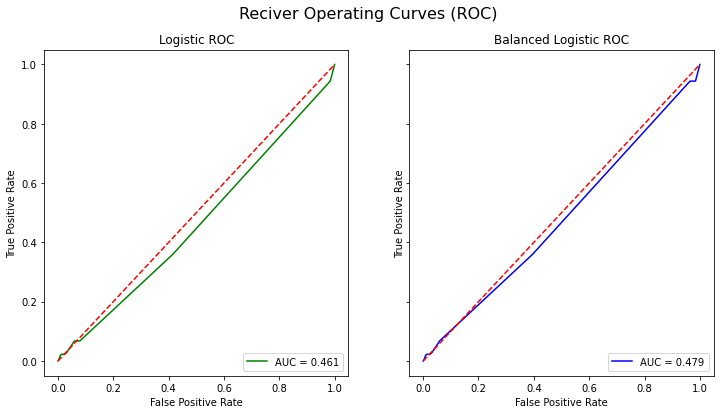

In [65]:
# Calculate roc curves for both logistic models
lr_auc, lr_fpr, lr_tpr = get_roc(lr)
lrb_auc, lrb_fpr, lrb_tpr = get_roc(lrb)

# Plot the curves
auc = [lr_auc, lrb_auc]
titles = ['Logistic ROC', 'Balanced Logistic ROC']
colors = ['g', 'b']
fpr = [lr_fpr, lrb_fpr]
tpr = [lr_tpr, lrb_tpr]
f, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, subplot_kw=dict(xlabel='False Positive Rate', ylabel='True Positive Rate'), figsize=(12,6))

for i,ax in enumerate(axs):
    plot_roc(axs[i], fpr[i], tpr[i], auc[i], titles[i], colors[i])

f.suptitle('Reciver Operating Curves (ROC)', fontsize=16);

### Can we improve by using Synthetic Minority Oversampling Technique (SMOTE)?

We will apply the SMOTE oversampling technique to the training data to attempt to fit our algorithm properly on the data. The test data will remain unchanged so that it correctly represents the original data.

Drawbacks: SMOTE can create lots of noisy data points.

Some experimentation revealed that the Adaptive Synthetic Sampling Method (ADASYN) performs better, so we use that after the first experiments with logistic regression.

In [66]:
# Looking at shape of starting data
counter = Counter(y_train)
print('Before Oversampling: ', counter)

Before Oversampling:  Counter({0: 608, 1: 395})


In [166]:
# Applying SMOTE to training data
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

# Applying ADASYN to training data
ad = ADASYN()
X_train_ad, y_train_ad = ad.fit_resample(X_train, y_train)

In [168]:
# Looking at shape of resampled data
print('After Oversampling (SMOTE): ', Counter(y_train_sm))
print('After Oversampling (ADASYN): ', Counter(y_train_ad))

After Oversampling (SMOTE):  Counter({0: 608, 1: 608})
After Oversampling (ADASYN):  Counter({1: 645, 0: 608})


In [172]:
# Instantiate model
lrsm = LogisticRegression()

# Fit model
lrsm.fit(X_train_sm, y_train_sm)

# Make predictions
lrsm_pred = lrsm.predict(X_test)

# Evaluate model
print('Using SMOTE:')
print(confusion_matrix(y_test, lrsm_pred))
print(classification_report(y_test, lrsm_pred))

Using SMOTE:
[[238  15]
 [166  12]]
              precision    recall  f1-score   support

           0       0.59      0.94      0.72       253
           1       0.44      0.07      0.12       178

    accuracy                           0.58       431
   macro avg       0.52      0.50      0.42       431
weighted avg       0.53      0.58      0.47       431



In [173]:
# Instantiate model
lrad = LogisticRegression()

# Fit model
lrad.fit(X_train_ad, y_train_ad)

# Make predictions
lrad_pred = lrad.predict(X_test)

# Evaluate model
print('Using ADASYN:')
print(confusion_matrix(y_test, lrad_pred))
print(classification_report(y_test, lrad_pred))

Using ADASYN:
[[ 94 159]
 [ 64 114]]
              precision    recall  f1-score   support

           0       0.59      0.37      0.46       253
           1       0.42      0.64      0.51       178

    accuracy                           0.48       431
   macro avg       0.51      0.51      0.48       431
weighted avg       0.52      0.48      0.48       431



Ok! So we are now showing quite an increase in the metrics for predicting death (1), but unfortunately, the metrics really aren't great values. Let's see if we can improve by using cross-validation and a grid search. Since ADASYN oversampling appears to do better in terms of predicting deaths, we'll use that.

In [321]:
# Defining parameters for our grid search
#weights = np.linspace(0.0,0.99,100)
weights = [0.01, 0.13, 0.25, 0.37, 0.49, 0.5, 0.51, 0.63, 0.75, 0.87, 0.99]

param_grid = [
    {'penalty': ['l2'], 'solver': ['newton-cg', 'sag', 'lbfgs'], 'C': [0.1, 1, 10], 'class_weight': [{0:x, 1:1.0-x} for x in weights]},
    {'penalty': ['l1'], 'solver': ['saga', 'liblinear'], 'C': [0.1, 1, 10], 'class_weight': [{0:x, 1:1.0-x} for x in weights]}
]

In [368]:
# Instantiate model
lrg = LogisticRegression()

# Cross validation setup
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=108)

# Setup grid search
lrg_grid = GridSearchCV(estimator=lrg, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1_macro', verbose=1)

# Execute grid search
lrg_result = lrg_grid.fit(X_train_ad, y_train_ad)

Fitting 15 folds for each of 165 candidates, totalling 2475 fits


In [371]:
# Print best configuration
print("Best: %f using %s" % (lrg_result.best_score_, lrg_result.best_params_))

# Print all configurations
means = lrg_result.cv_results_['mean_test_score']
stds = lrg_result.cv_results_['std_test_score']
params = lrg_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.548201 using {'C': 0.1, 'class_weight': {0: 0.5, 1: 0.5}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.339832 (0.000439) with: {'C': 0.1, 'class_weight': {0: 0.01, 1: 0.99}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.339832 (0.000439) with: {'C': 0.1, 'class_weight': {0: 0.01, 1: 0.99}, 'penalty': 'l2', 'solver': 'sag'}
0.339832 (0.000439) with: {'C': 0.1, 'class_weight': {0: 0.01, 1: 0.99}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.339832 (0.000439) with: {'C': 0.1, 'class_weight': {0: 0.13, 1: 0.87}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.339832 (0.000439) with: {'C': 0.1, 'class_weight': {0: 0.13, 1: 0.87}, 'penalty': 'l2', 'solver': 'sag'}
0.339832 (0.000439) with: {'C': 0.1, 'class_weight': {0: 0.13, 1: 0.87}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.339832 (0.000439) with: {'C': 0.1, 'class_weight': {0: 0.25, 1: 0.75}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.339832 (0.000439) with: {'C': 0.1, 'class_weight': {0: 0.25, 1: 0.75}, 'penalty': 'l2', 'solver': 'sag'}
0.339832 (0.0004

In [380]:
# We'll use this training + cross-validation a few times
def cv_train(model, X, y):
    i = 1
    f1 = []
    roc = []
    auc = []
    folds = []
    for train_index, test_index in cv.split(X, y):
        X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
        y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]

        # Fit model
        model.fit(X_tr, y_tr)

        # Predict
        pred = model.predict(X_ts)

        # Evaluate
        f1.append(f1_score(y_ts, pred))
        roc.append(roc_auc_score(y_ts, pred))
        folds.append(i)
        i += 1

    results = pd.DataFrame({'Fold': folds, 'F1-score': f1, 'ROC-AUC-score': roc})
    results.set_index('Fold', inplace=True)
    
    return results

In [381]:
# Instantiate model based on best parameters
lrg = LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 0.5}, penalty='l2', solver='newton-cg')

# Train using cross-validation
lrg_results = cv_train(lrg, X_train_ad, y_train_ad)

# View results
lrg_results

,F1-score,ROC-AUC-score
Fold,,
1,0.626198,0.527386
2,0.645768,0.542667
3,0.673139,0.591625
4,0.664516,0.576911
5,0.668896,0.598341
6,0.692308,0.611228
7,0.651613,0.563604
8,0.638710,0.547655
9,0.662295,0.581556


In [374]:
# Make predictions from test data
lrg_pred = lrg.predict(X_test)

# Evaluate model
print(confusion_matrix(y_test, lrg_pred))
print(classification_report(y_test, lrg_pred))

[[ 95 158]
 [ 65 113]]
              precision    recall  f1-score   support

           0       0.59      0.38      0.46       253
           1       0.42      0.63      0.50       178

    accuracy                           0.48       431
   macro avg       0.51      0.51      0.48       431
weighted avg       0.52      0.48      0.48       431



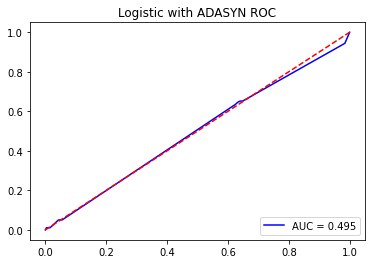

In [375]:
lrg_auc, lrg_fpr, lrg_tpr = get_roc(lrg)
plot_roc(plt, lrg_fpr, lrg_tpr, lrg_auc, 'Logistic with ADASYN ROC', 'b')

Even after tuning our parameters, it looks like we really don't improve - a consequence of our features not being strongly correlated to our target.

### Random Forest

Since Logistic Regression didn't give us a great model, lets try a random forest (since a random forest generally outperforms a decision tree, we won't do a single decision tree).

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [378]:
# Defining parameters for our grid search
param_grid = { 
    'n_estimators': [100, 200],
    'criterion' :['gini', 'entropy'],
    'class_weight': [{0:x, 1:1.0-x} for x in weights]
}

In [379]:
# Instantiate model
rfc = RandomForestClassifier()

# Setup grid search
rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1_macro', verbose=1)

# Execute grid search
rfc_result = rfc_grid.fit(X_train_ad, y_train_ad)

Fitting 15 folds for each of 44 candidates, totalling 660 fits


In [382]:
# Print best configuration
print("Best: %f using %s" % (rfc_result.best_score_, rfc_result.best_params_))

# Print all configurations
means = rfc_result.cv_results_['mean_test_score']
stds = rfc_result.cv_results_['std_test_score']
params = rfc_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.556943 using {'class_weight': {0: 0.49, 1: 0.51}, 'criterion': 'gini', 'n_estimators': 100}
0.345003 (0.006179) with: {'class_weight': {0: 0.01, 1: 0.99}, 'criterion': 'gini', 'n_estimators': 100}
0.345003 (0.006179) with: {'class_weight': {0: 0.01, 1: 0.99}, 'criterion': 'gini', 'n_estimators': 200}
0.345003 (0.006179) with: {'class_weight': {0: 0.01, 1: 0.99}, 'criterion': 'entropy', 'n_estimators': 100}
0.345003 (0.006179) with: {'class_weight': {0: 0.01, 1: 0.99}, 'criterion': 'entropy', 'n_estimators': 200}
0.345605 (0.005964) with: {'class_weight': {0: 0.13, 1: 0.87}, 'criterion': 'gini', 'n_estimators': 100}
0.345003 (0.006179) with: {'class_weight': {0: 0.13, 1: 0.87}, 'criterion': 'gini', 'n_estimators': 200}
0.345003 (0.006179) with: {'class_weight': {0: 0.13, 1: 0.87}, 'criterion': 'entropy', 'n_estimators': 100}
0.345003 (0.006179) with: {'class_weight': {0: 0.13, 1: 0.87}, 'criterion': 'entropy', 'n_estimators': 200}
0.349537 (0.008777) with: {'class_weight': {0: 0

In [383]:
# Instantiate model based on best parameters
rfcg = RandomForestClassifier(class_weight={0: 0.49, 1: 0.51}, criterion='gini', n_estimators=100)

# Train using cross-validation
rfcg_results = cv_train(rfcg, X_train_ad, y_train_ad)

# View results
rfcg_results

,F1-score,ROC-AUC-score
Fold,,
1,0.624204,0.523288
2,0.662461,0.566813
3,0.681818,0.603698
4,0.670968,0.584919
5,0.688312,0.609200
6,0.688103,0.607352
7,0.656051,0.563159
8,0.649682,0.555185
9,0.679868,0.605836


In [384]:
# Make predictions from test data
rfcg_pred = rfcg.predict(X_test)

# Evaluate model
print(confusion_matrix(y_test, rfcg_pred))
print(classification_report(y_test, rfcg_pred))

[[100 153]
 [ 65 113]]
              precision    recall  f1-score   support

           0       0.61      0.40      0.48       253
           1       0.42      0.63      0.51       178

    accuracy                           0.49       431
   macro avg       0.52      0.52      0.49       431
weighted avg       0.53      0.49      0.49       431



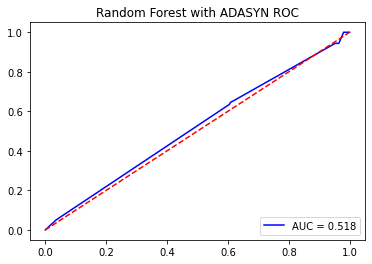

In [385]:
rfcg_auc, rfcg_fpr, rfcg_tpr = get_roc(rfcg)
plot_roc(plt, rfcg_fpr, rfcg_tpr, rfcg_auc, 'Random Forest with ADASYN ROC', 'b')

**Q:** Is this model any better?

**A:** Eh...not really. Even with all that hyperparameter tuning - we really didn't get anywhere.

That being said, there are probably other combinations of hyperparameters to be tested that I did not consider, in the interest of time.

### Support Vector Machines

Well, let's see if we can do any better here...

In [386]:
from sklearn.svm import SVC

In [387]:
# Instantiate model
svc = SVC()

# Grid setup
param_grid = [
    {'C': [1, 10, 100], 'class_weight': [{0:x, 1:1.0-x} for x in weights], 'kernel': ['linear'], 'probability': [True]},
    {'C': [1, 10, 100], 'class_weight': [{0:x, 1:1.0-x} for x in weights], 'gamma': [0.001, 0.0001, 'scale'], 'kernel': ['rbf'], 'probability': [True]},
]

# Grid search setup
svc_grid = GridSearchCV(estimator=svc, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1_macro')

# Execute grid search
svc_result = svc_grid.fit(X_train_ad, y_train_ad)

In [389]:
# Print best configuration
print("Best: %f using %s" % (svc_result.best_score_, svc_result.best_params_))

# Print all configurations
means = svc_result.cv_results_['mean_test_score']
stds = svc_result.cv_results_['std_test_score']
params = svc_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.553190 using {'C': 10, 'class_weight': {0: 0.51, 1: 0.49}, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
0.339832 (0.000439) with: {'C': 1, 'class_weight': {0: 0.01, 1: 0.99}, 'kernel': 'linear', 'probability': True}
0.339832 (0.000439) with: {'C': 1, 'class_weight': {0: 0.13, 1: 0.87}, 'kernel': 'linear', 'probability': True}
0.340070 (0.000903) with: {'C': 1, 'class_weight': {0: 0.25, 1: 0.75}, 'kernel': 'linear', 'probability': True}
0.367646 (0.034447) with: {'C': 1, 'class_weight': {0: 0.37, 1: 0.63}, 'kernel': 'linear', 'probability': True}
0.546001 (0.032512) with: {'C': 1, 'class_weight': {0: 0.49, 1: 0.51}, 'kernel': 'linear', 'probability': True}
0.546303 (0.032682) with: {'C': 1, 'class_weight': {0: 0.5, 1: 0.5}, 'kernel': 'linear', 'probability': True}
0.546303 (0.032682) with: {'C': 1, 'class_weight': {0: 0.51, 1: 0.49}, 'kernel': 'linear', 'probability': True}
0.327992 (0.004214) with: {'C': 1, 'class_weight': {0: 0.63, 1: 0.37}, 'kernel': 'linear', 'pro

In [390]:
# Instantiate model based on best parameters
svcg = SVC(C=10, class_weight={0: 0.51, 1: 0.49}, gamma='scale', kernel='rbf', probability=True)

# Train using cross-validation
svcg_results = cv_train(svcg, X_train_ad, y_train_ad)

# View results
svcg_results

,F1-score,ROC-AUC-score
Fold,,
1,0.626198,0.527386
2,0.662461,0.566813
3,0.673139,0.591625
4,0.664516,0.576911
5,0.668896,0.598341
6,0.692308,0.611228
7,0.651613,0.563604
8,0.638710,0.547655
9,0.679868,0.605836


In [391]:
# Make predictions from test data
svcg_pred = rfcg.predict(X_test)

# Evaluate model
print(confusion_matrix(y_test, svcg_pred))
print(classification_report(y_test, svcg_pred))

[[100 153]
 [ 65 113]]
              precision    recall  f1-score   support

           0       0.61      0.40      0.48       253
           1       0.42      0.63      0.51       178

    accuracy                           0.49       431
   macro avg       0.52      0.52      0.49       431
weighted avg       0.53      0.49      0.49       431



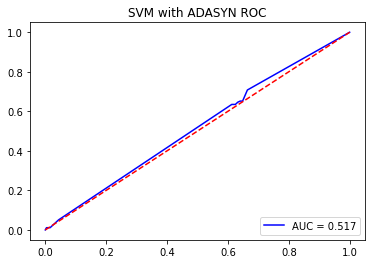

In [392]:
# Evaluate ROC
svcg_auc, svcg_fpr, svcg_tpr = get_roc(svcg)
plot_roc(plt, svcg_fpr, svcg_tpr, svcg_auc, 'SVM with ADASYN ROC', 'b')

Still disappointing. Our features just aren't correlated enough to train an effective model. But it was fun to play with the algorithms!